# Federico Andrucci - 000105....

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from plot_silhouette import plot_silhouette

# Variables
file_name = 'lab_exercise.csv'
separator = ','
random_state = 42

# Directives
%matplotlib inline
np.random.seed(random_state)

1. the boxplots of the attributes and a comment on remarkable situations, if any (2pt)
2. a pairplot of the data (see Seaborn pairplot) and a comment on remarkable situations, if
any (2pt)
3. a clustering schema using a method of your choice exploring a range of parameter
values (5pt)
4. the plot of the global inertia (SSD) and silhouette index for the parameter values you
examine (4pt)
5. the optimal parameters of your choice (4pt)
6. a pairplot of the data using as hue the cluster assignment with the optimal parameter
(3pt)
7. a plot of the silhouette index for the data points, grouped according to the clusters
(4pt)
8. A sorted list of the discovered clusters for decreasing sizes (7pt)

## 1. the boxplots of the attributes and a comment on remarkable situations, if any (2pt)

In [7]:
# Read the file

df = pd.read_csv(file_name, delimiter=separator, header=None)

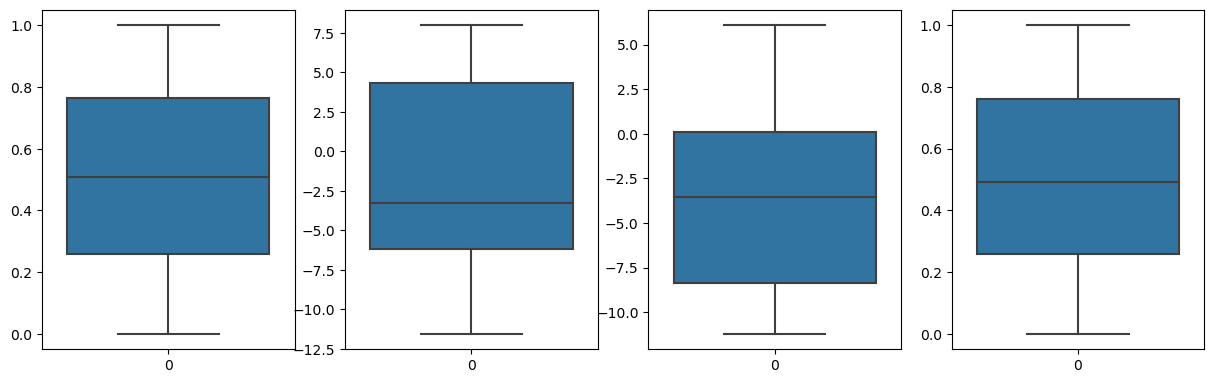

In [9]:
# Produce the boxplot

plt.figure(figsize=(15, 15))
pos = 1
for i in df.columns:
    plt.subplot(3, 4, pos) # It looks bad otherwise
    sns.boxplot(df[i])
    pos += 1

The boxplot show that there are no outliers. The distribution of 0 and 3 is very similar, and the distribution of 1 and 2 have a similar median but different distribution of values.

## 2. a pairplot of the data (see Seaborn pairplot) and a comment on remarkable situations, if any (2pt)

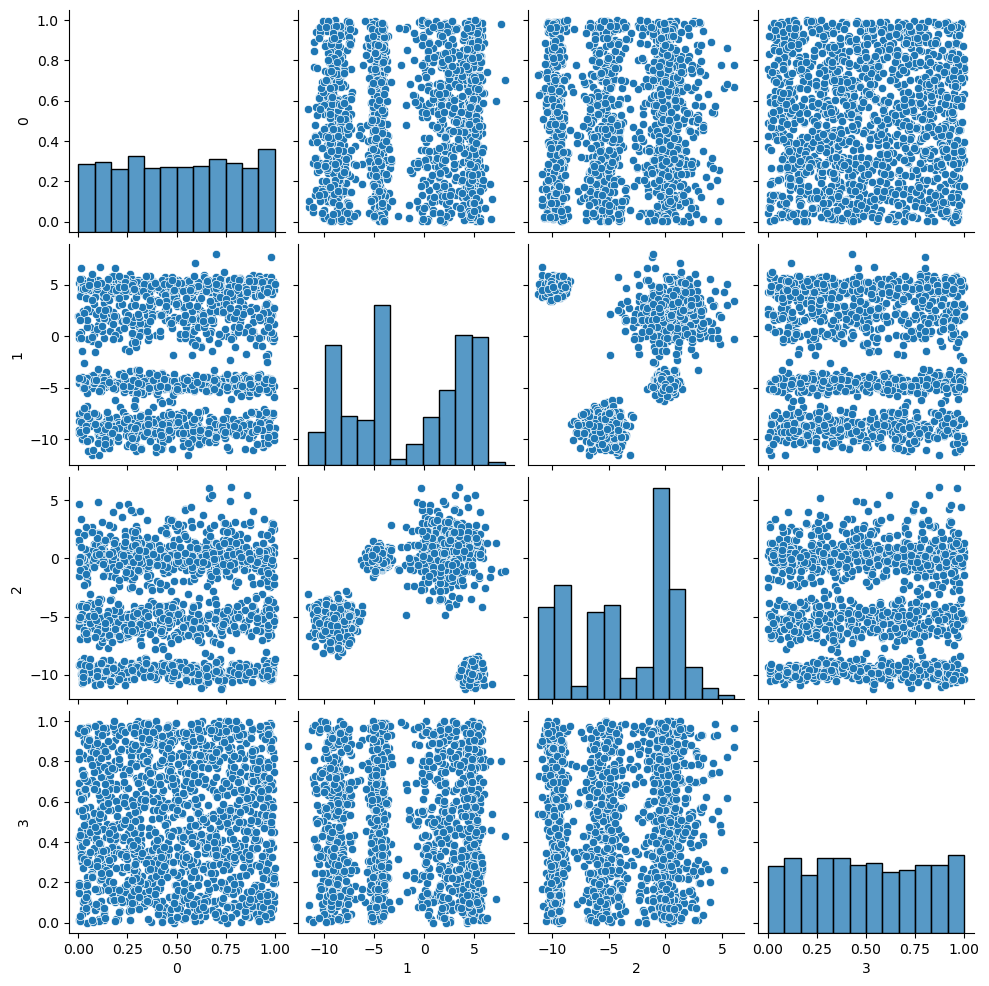

In [10]:
sns.pairplot(df)

The pairplot shows clearly that the columns 1 and 2 have 3 distinct clusters.

## 3. a clustering schema using a method of your choice exploring a range of parameter values (5pt)

In order to find a clustering scheme, we will use K-means with the elbow method, ranging from 2 to 10 clusters

In [21]:
k_range = range(2, 11)

# inertia and silhouette ad measures
inertias = []
silhouette_scores = []

for i in k_range:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=random_state)
    y_km = km.fit_predict(df)
    inertias.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df, y_km))

## 4. the plot of the global inertia (SSD) and silhouette index for the parameter values you examine (4pt)

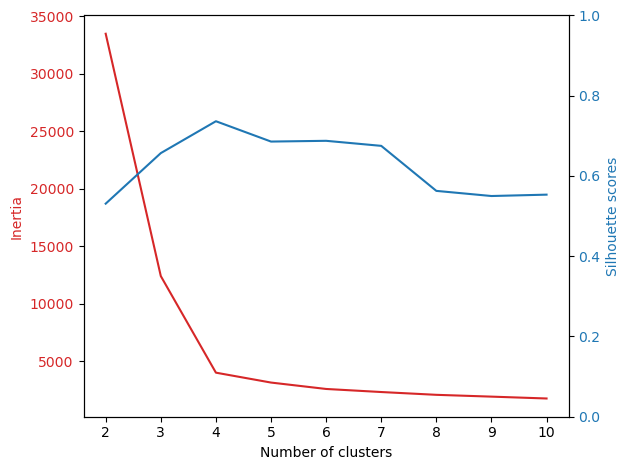

In [22]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(k_range, inertias, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Silhouette scores', color=color)  # we already handled the x-label with ax1
ax2.plot(k_range, silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,1) # the axis for silhouette is [0,1]

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## 5. the optimal parameters of your choice (4pt)

Both the silhouette scores and the inertia suggest that the best number of clusters is 4, which is in line with what we were expecting.

In [23]:
best_k = 4

## 6. a pairplot of the data using as hue the cluster assignment with the optimal parameter (3pt)

In [24]:
# Create a new KMeans classifier with the new best parameter we foubf
km = KMeans(n_clusters=best_k, init='k-means++', n_init=10, max_iter=300, random_state=random_state)

# Predict the cluster labels
y_km = km.fit_predict(df)

In order to use the predicted labels as hue we will add it to a new dataframe usign **assign** method

In [25]:
X_pred = df.assign(pred_class=y_km)

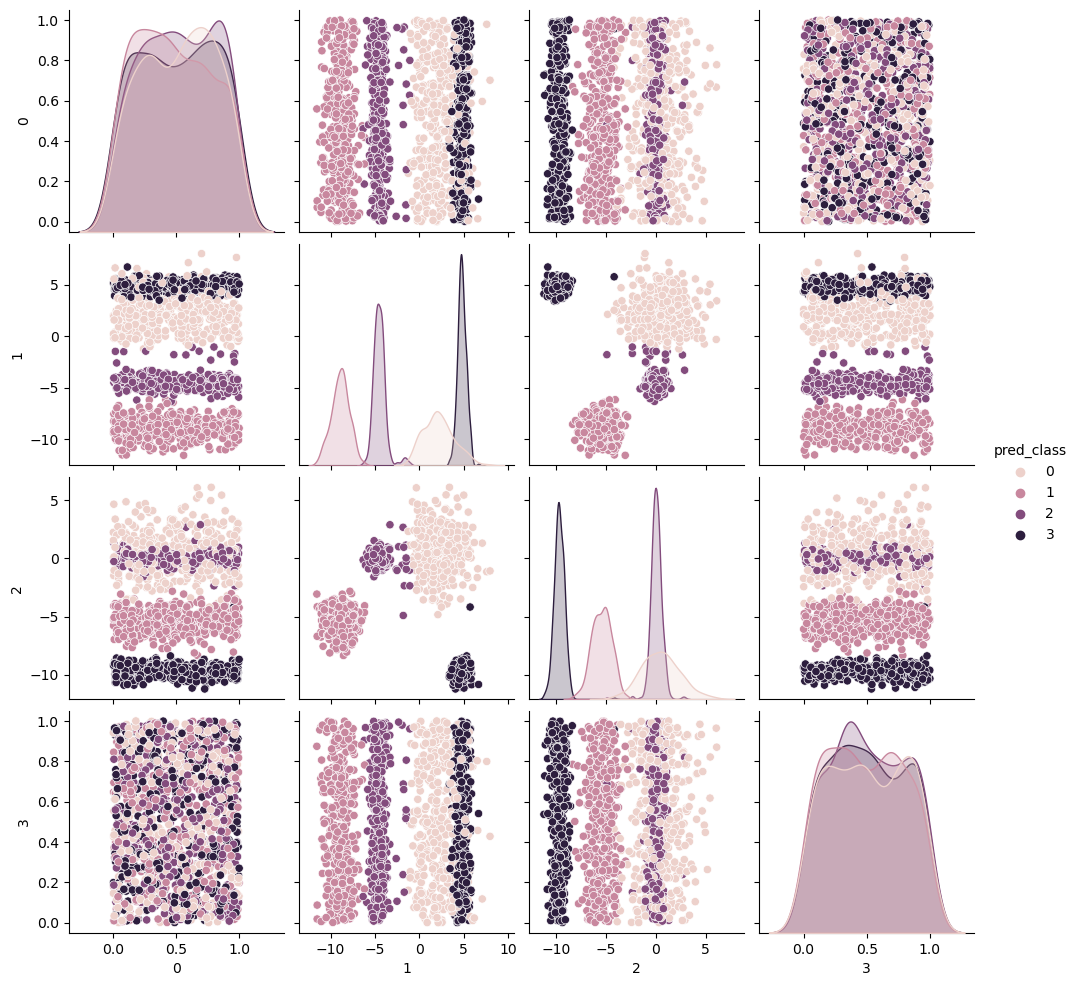

In [26]:
sns.pairplot(X_pred, hue='pred_class')

## 7. a plot of the silhouette index for the data points, grouped according to the clusters (4pt)

In order to perform this task, we will use the `plot_silhouette` function that was introduced in the class

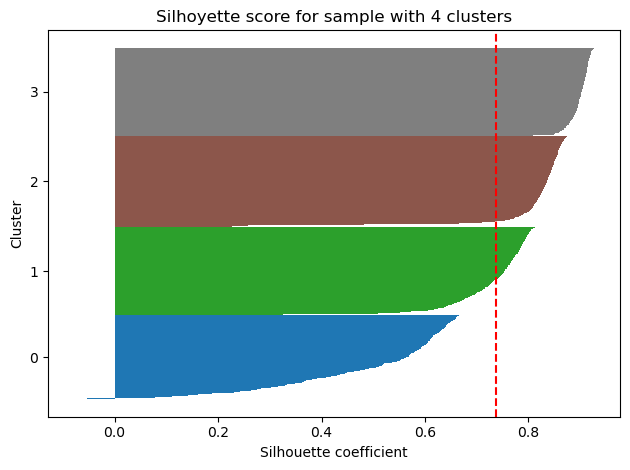

In [27]:
silhouette_score_samples = silhouette_samples(df, y_km, metric='euclidean')

plt.title(f'Silhoyette score for sample with {best_k} clusters')
plot_silhouette(silhouette_score_samples, y_km)

## 7. A sorted list of the discovered clusters for decreasing sizes (7pt)

In order to make this task easier, we utilize numpy `bincount`

In [28]:
occurencies = np.bincount(y_km)

`bincount` create an array that contains as index the cluster numbers, as value, the elements in that cluster.

In [29]:
item_cluster_tuples = [(qty, index) for index, qty in enumerate(occurencies)]

In [30]:
item_cluster_tuples

[(359, 0), (375, 1), (390, 2), (376, 3)]

We can now sort the tuples and extract the cluster index to obtain what was requested

In [31]:
sorted_clusters = [i[1] for i in sorted(item_cluster_tuples, reverse=True)]

In [32]:
sorted_clusters

[2, 3, 1, 0]